# Assignment 6 - Numpy and Matplotlib
### Due Thursday October 12
Your assignment should be handed in as an ipython notebook checked into your github repository in a new folder named `assignment_6`. To download this assignment, your best option is to clone the original github repository for the course website:

```git clone https://github.com/rabernat/research_computing.git```

and then navigate to the `assignment` folder.

## 1 Plotting and analyzing ARGO float data

#### 1.1 Import numpy


In [1]:
import numpy as np


#### 1.2 Use the shell command `curl` to download an example ARGO float profile from the North Atlantic.
The data file's url is http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

In [2]:
!curl -O http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  140k  100  140k    0     0   123k      0  0:00:01  0:00:01 --:--:-- 2068k


#### 1.3 Load the data file

In [3]:
data=np.load('argo_float_4901412.npz')

numpy.lib.npyio.NpzFile

#### 1.4 Extract the temperature, pressure and salinity arrays to arrays T, S, P and mask out invalid data (the nan values from missing points).

In [4]:
print(data.files)#data.keys()
T=np.ma.masked_invalid(data.f.T) # T=np.ma.masked_invalid(data['T'])
S=np.ma.masked_invalid(data.f.S) # S=np.ma.masked_invalid(data['S'])
P=np.ma.masked_invalid(data.f.P) # P=np.ma.masked_invalid(data['P'])

['S', 'T', 'levels', 'lon', 'date', 'P', 'lat']


#### 1.5 Extract the date, lat, lon, and level arrays. 


In [5]:
date=data.f.date
lat=data.f.lat
lon=data.f.lon
levels=data.f.levels

#### 1.5 Note the shapes of T, S and P compared to these arrays. How do they line up?

In [6]:
print(T.shape,S.shape,P.shape)
print(date.shape,lat.shape,lon.shape,levels.shape)
#The Argo data file records the temperature, pressure and salinity at 78 levels, at 75 location (lat and lon) with the corresponding recording date

(78, 75) (78, 75) (78, 75)
(75,) (75,) (75,) (78,)


#### 1.6 Load the necessary package for plotting using pyplot from matplotlib.

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

#### 1.7 Make a 1 x 3 array of plots for each column of data in T, S and P. 
The vertical scale should be the `levels` data. Flip the veritcal axis direction so that levels increase downward on the plot. Each plot should have a line for each column of data. It will look messy.  Make sure you label the axes and put a title on each subplot.

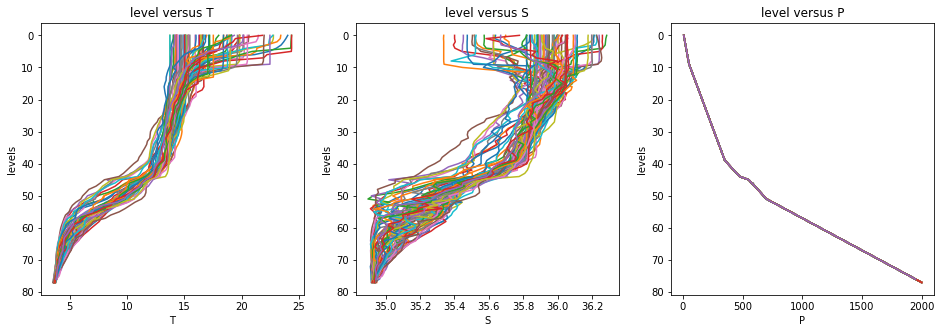

In [9]:
datum=dict([('T',T),('S',S),('P',P)])

fig,axes = plt.subplots(1,3,figsize=(16,5))
for ax, k in zip (axes, datum):
        ax.plot(datum[k],levels)
        ax.invert_yaxis()
        titlestr='level versus ' + str(k)  
        ax.set_title(titlestr)
        ax.set_xlabel(k)
        ax.set_ylabel('levels')

#### 1.8 Compute the mean and standard deviation of each of T, S and P at each depth in `level`.

In [11]:
##modification
print(datum.keys()) 
depth_mean=[np.mean(datum[k],1) for k in datum] #take average along columns
depth_std=[np.std(datum[k],1) for k in datum]
depmean=dict([('depth_mean_T',depth_mean[0]),('depth_mean_S',depth_mean[1]),('depth_mean_P',depth_mean[2])])
depstd=dict([('depth_std_T',depth_std[0]),('depth_std_S',depth_std[1]),('depth_std_P',depth_std[2])])

dict_keys(['T', 'S', 'P'])


#### 1.9 Now make a similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations. 
 Again, make sure you label the axes and put a title on each subplot.

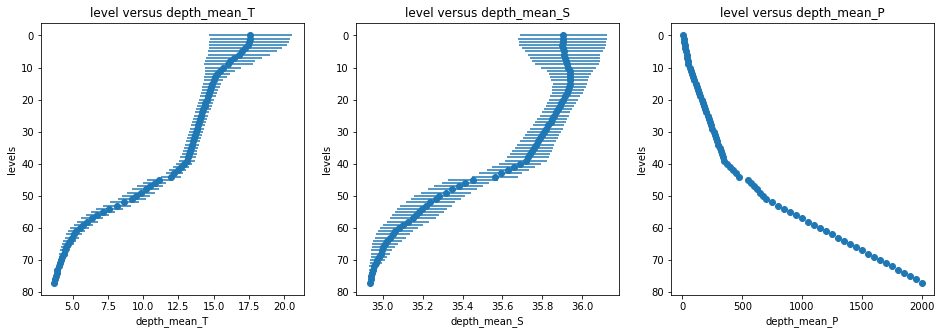

In [12]:
fig,axes = plt.subplots(1,3,figsize=(16,5))
for ax, km, ks in zip (axes, depmean,depstd):
        ax.errorbar(depmean[km], levels, xerr=depstd[ks], fmt='o')
        ax.invert_yaxis()
        titlestr='level versus ' + str(km)  
        ax.set_title(titlestr)
        ax.set_xlabel(km)
        ax.set_ylabel('levels')

#### 1.10  Compute the mean and standard deviation of each of T, S and P for each time in `date`.

In [13]:
##modification
date_mean=[np.mean(datum[k],0) for k in datum]
date_std=[np.std(datum[k],0) for k in datum]
datemean=dict([('date_mean_T',date_mean[0]),('date_mean_S',date_mean[1]),('date_mean_P',date_mean[2])])
datestd=dict([('date_std_T',date_std[0]),('date_std_S',date_std[1]),('date_std_P',date_std[2])])

#### 1.11 Plot the mean T, S and P for each entry in *time*, now on a *3 x 1* subplot grid with time on the horizontal axis. Show error bars on each plot using the standard deviations.

In [14]:
from datetime import datetime
date_trans=np.array([datetime.fromtimestamp(d.astype('O')/1e9)for d in date])

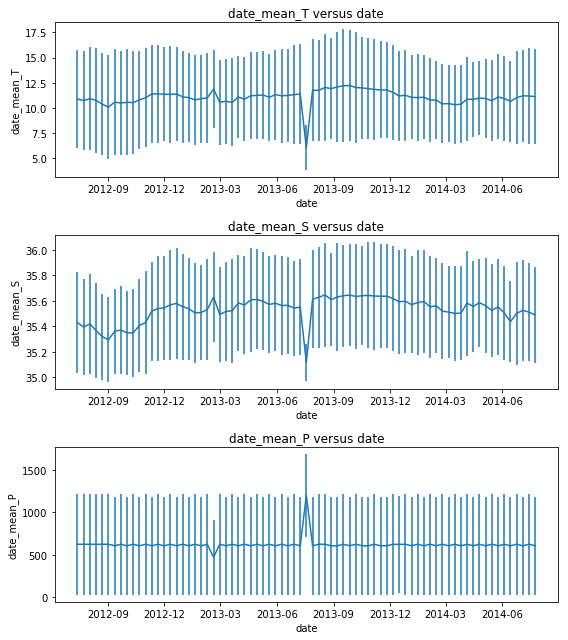

In [15]:
fig,axes = plt.subplots(3,1,figsize=(8,9))
for ax, km, ks in zip (axes, datemean,datestd):
        ax.errorbar(date_trans,datemean[km], yerr=datestd[ks])
        titlestr= str(km) + ' versus date'
        ax.set_title(titlestr)
        ax.set_ylabel(km)
        ax.set_xlabel('date')
plt.tight_layout()

#### 1.12 Create a scatter plot of the positions of the ARGO float data.  Color the positions by the date. Add a grid overlay. 
Don't forget to label the axes!

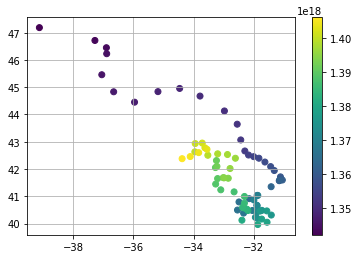

In [16]:
plt.scatter(lon, lat, c=date)
plt.grid()
plt.colorbar()

## 2 Matrix  multiplication revisited
#### 2.1 Create a function called myMatrixMultiply that takes input matrices X and Y and computes their matrix product. 
Use the same three loop formulation from Assignment 5. If you want, you can replace the innermost loop with the sum operation or a matrix dot product since that may speed things up a bit.

In [17]:
def myMatrixMultiply(X,Y):
    """takes input matrices X and Y and computes their matrix product, using the three-loop formulation from assignment5"""
    product=np.zeros([X.shape[0],Y.shape[1]])
    for i in range(X.shape[0]):
        for j in range(Y.shape[1]):
            product[i,j]=np.dot(X[i,:],Y[:,j])
    
    return product

#### 2.2 Create ones() square matrices for A and B with n = 100. Use the `%timeit` function to compute the matrix product AB using your function `myMatrixMultiply`.

In [18]:
A=np.ones((100,100))
B=np.ones((100,100))
%timeit y=myMatrixMultiply(A,B)

100 loops, best of 3: 18 ms per loop


#### 2.3 Now let's see how much faster Numpy's built in matrix multiplication routine is. 
In Numpy, matrix multiplication is done using the `dot()` function. Use the `%timeit` function to compute the matrix product AB for n = 100 using `dot()` and time it using the `%timeit` function.

In [19]:
A=np.ones((100,100))
B=np.ones((100,100))
%timeit y=np.dot(A,B)

The slowest run took 114.31 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 42.4 µs per loop


Now time how long it takes for n = 1000

In [20]:
A=np.ones((1000,1000))
B=np.ones((1000,1000))
%timeit y=np.dot(A,B)

10 loops, best of 3: 34.8 ms per loop


When I ran this on my Mac laptop and used Activity Monitor.app to view the CPU usage of Python, I noticed that it was using up to 400% of my CPU. My laptop has 4 processing cores, so 400% means it was using all four cores to compute the matrix product. In other words, it was using parallel processing to speed up the calculations. Numpy uses some highly optimized versions of the BLAS linear algebra routines that are part of the Intel Math Kernel Library. By default, it  uses a multi-threaded version of the MKL to take advantage of the many processing cores available on modern computers. Let's turn off multithreading and see how much slower it runs. 

In your notebook type:
```
import mkl
mkl.set_num_threads(1)
```
Now rerun the n=1000 example using the `dot()` function.

In [21]:
import mkl
mkl.set_num_threads(1)
A=np.ones((1000,1000))
B=np.ones((1000,1000))
%timeit y=np.dot(A,B)

10 loops, best of 3: 60.8 ms per loop
